## Imports

In [98]:
import os
import sys
module_path = os.path.abspath(os.path.join('../regex'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [99]:
import re
import helper
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Dataframe Aposentadoria

In [100]:
files = helper.get_files_path("../data/test/")
rets_final = helper.extract_multiple(files, "aposentadoria")

# Análise

In [101]:
def plot_prop(labels, sizes):
    fig1, ax1 = plt.subplots(figsize=(10,10))
    cor = ['#1b9aaa', '#06d6a0']
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=cor)
    ax1.axis("equal")
    ax1.legend(labels, title="Presença", 
            loc='center left', 
            bbox_to_anchor=(1.3, 0, 0.5, 1))
    plt.show()

## Nome

In [102]:
presence_name = rets_final["Nome"].value_counts()
total = rets_final.count()
presence_name[0]
total[0]

192

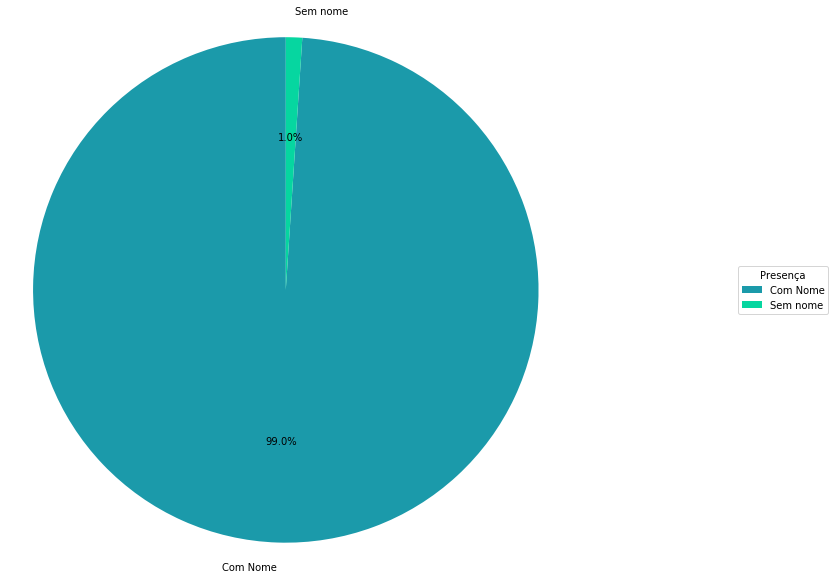

In [103]:
labels = ["Com Nome", "Sem nome"]
sizes = [total[0] - presence_name[0], presence_name[0]]
plot_prop(labels, sizes)

## Matrícula 

In [104]:
presence_registration = rets_final["Matrícula"].value_counts()
presence_registration
wrong_registrations = 0
for i in range(0, 5):
    wrong_registrations += presence_registration[i]
    
wrong_registrations

8

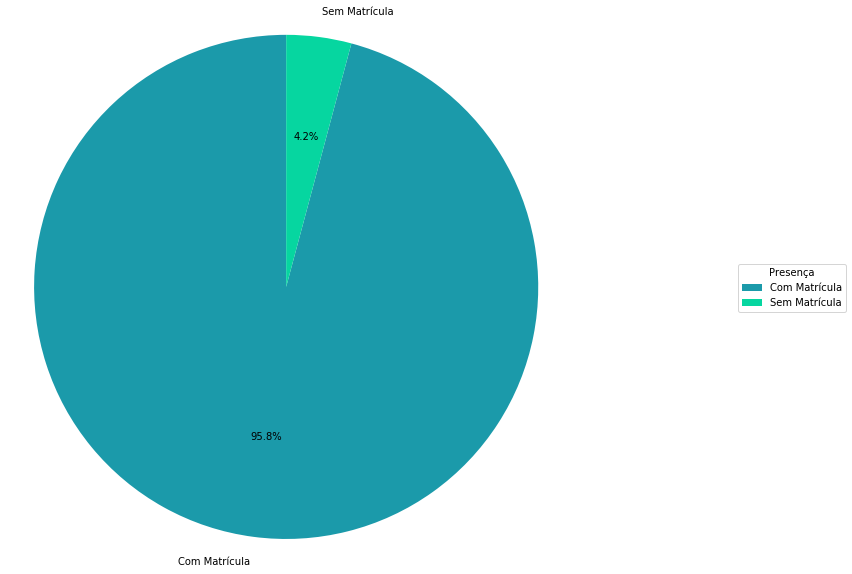

In [105]:
labels = ["Com Matrícula", "Sem Matrícula"]
sizes = [total[3] - wrong_registrations, wrong_registrations]
plot_prop(labels, sizes)

## Cargo

In [106]:
presence_role = rets_final["Cargo"].value_counts()
presence_role[2]
total[5]

192

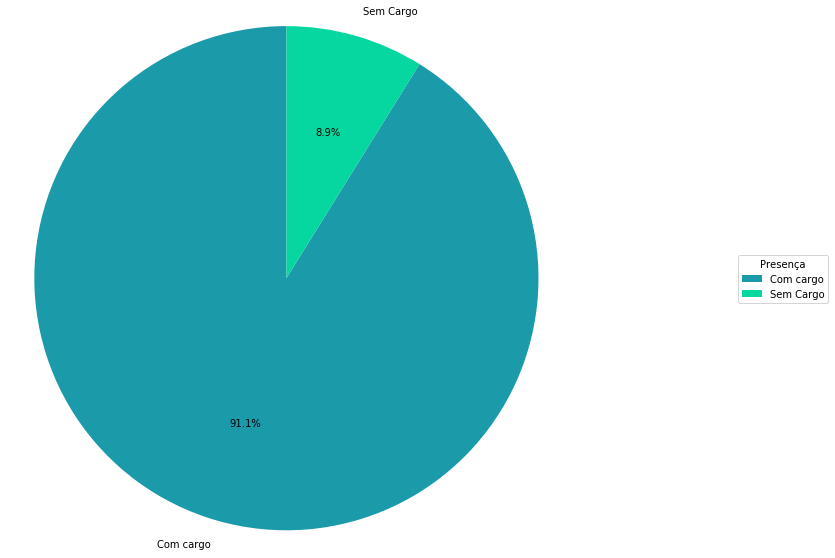

In [107]:
labels = ["Com cargo", "Sem Cargo"]
sizes = [total[5] - presence_role[2], presence_role[2]]
plot_prop(labels, sizes)

## Quadro

In [108]:
presence_board = rets_final["Quadro"].value_counts()
total[8] 

all_keys = presence_board.keys()
for i in range(0, len(all_keys)):
    if all_keys[i] == "nan":
        index = i
presence_board[index]

2

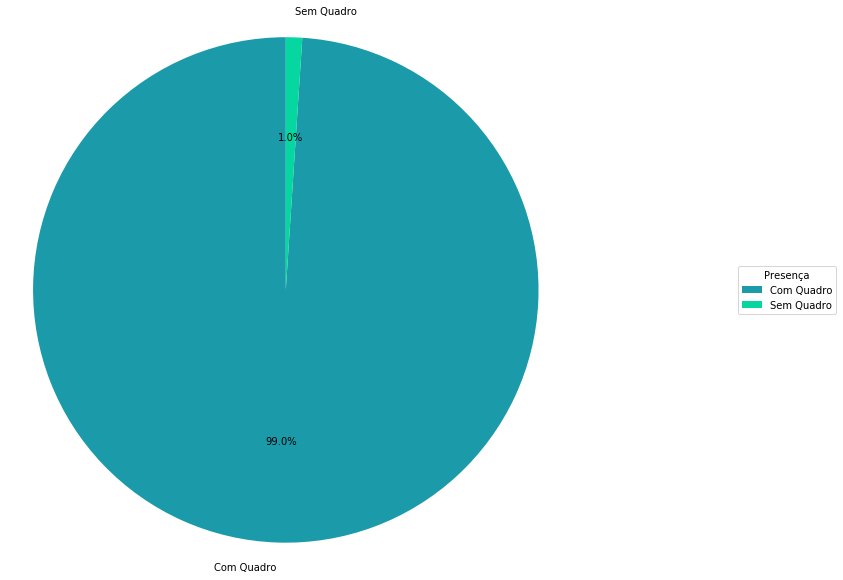

In [109]:
labels = ["Com Quadro", "Sem Quadro"]
sizes = [total[8] - presence_board[index], presence_board[index]]
plot_prop(labels, sizes)

## Fundamento Legal

In [110]:
presence_legal_foundation = rets_final["Fundamento Legal"].value_counts()
total[7]
presence_legal_foundation[0]

96

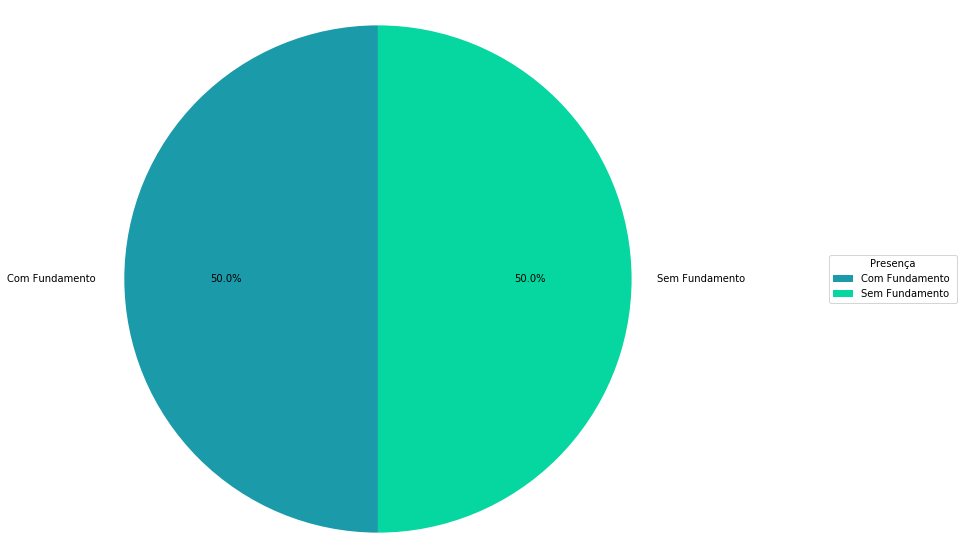

In [111]:
labels = ["Com Fundamento ", "Sem Fundamento"]
sizes = [total[7] - presence_legal_foundation[0], presence_legal_foundation[0]]
plot_prop(labels, sizes)

## Órgão

In [112]:
presence_agency = rets_final["Orgao"].value_counts()
presence_agency[1]
none = total[0] - total[10]
wrong = none + presence_agency[1]

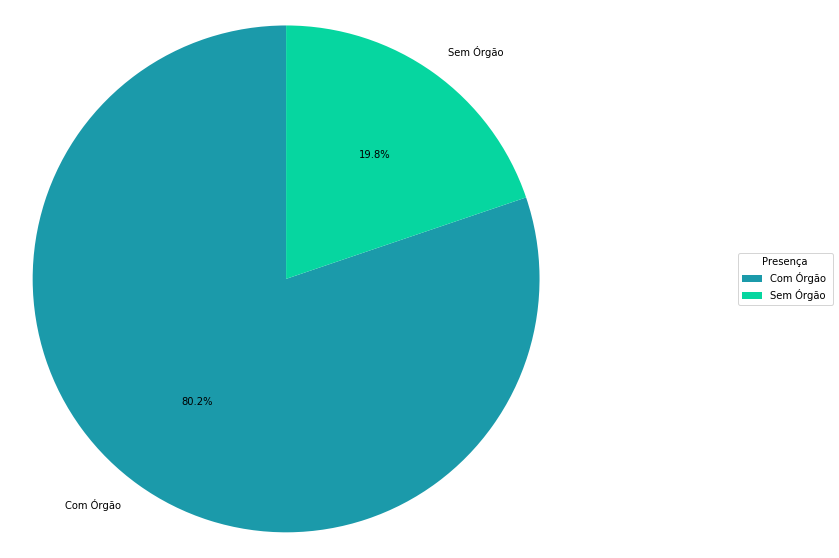

In [113]:
labels = ["Com Órgão ", "Sem Órgão"]
sizes = [total[0] - wrong, wrong]
plot_prop(labels, sizes)

## Processo GDF/SEI

In [114]:
presence_process = rets_final["SEI"].value_counts()
total[1]
index_2 = 0
all_keys = presence_process.keys()
for i in range(0, len(all_keys)):
    if all_keys[i] == "nan":
        index_2 = i
nan = presence_process[index_2]
nan

44

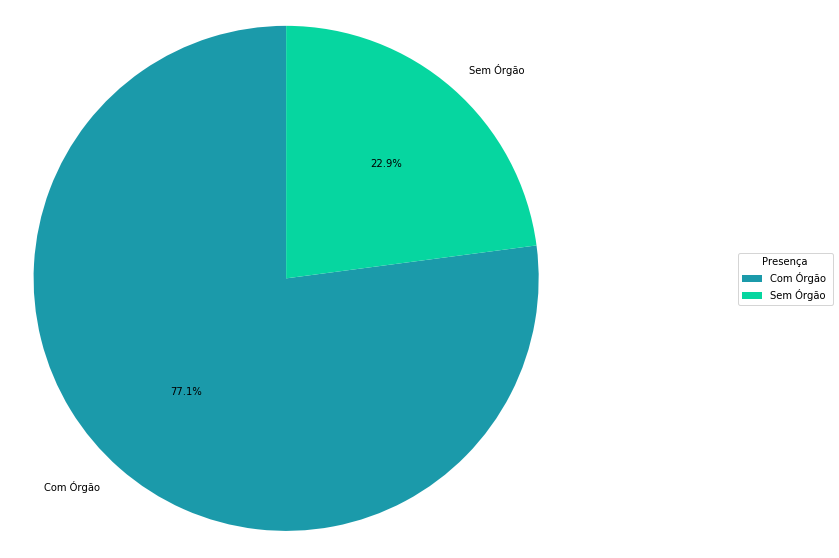

In [115]:
sizes = [total[1] - nan, nan]
plot_prop(labels, sizes)

# Tabela Resumo

In [116]:
def percentage(num1, num2):
    percentage = '{0:.1f}'.format((num1 / num2 * 100))
    return percentage

percentages = [percentage(total[0] - presence_name[0], total[0]), 
               percentage(total[3] - wrong_registrations, total[0]),
               percentage(total[5] - presence_role[2], total[0]),
               percentage(total[8] - presence_board[index], total[0]),
               percentage(total[7] - presence_legal_foundation[0], total[0]),
               percentage(total[0] - wrong, total[0]),
               percentage(total[1] - nan, total[0]),
              ]

In [117]:
atos = ["Nome", "Matrícula", "Cargo", "Quadro", "Fundamento", "Órgão","SEI"]

percentage_table ={"Atos": atos, "% de presença": percentages}

percentage_table = pd.DataFrame(percentage_table).style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align','left')] ) ])
percentage_table

,Atos,% de presença
0,Nome,99.0
1,Matrícula,95.8
2,Cargo,91.1
3,Quadro,99.0
4,Fundamento,50.0
5,Órgão,80.2
6,SEI,77.1
